# Predicting GPAs of MSU Students

### <p style="text-align: right;"> &#9989; Navya Singh</p>

## 1 Background and Motivation

Grade Point Average (GPA) is a single cumulative number that represents one's entire academic performance. Through this project, we wanted to evaluate how GPA trends vary over the years and if they can used for future predictions. We mainly answered the following questions:
1. How accurate is past GPA data in predicting the present records
2. How do GPA trends vary across semesters and years

## 2 Methodology

### 2.1 Importing Relevant Packages



In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML
import seaborn as sns
from matplotlib import animation
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### 2.2 Reading in data

In [2]:
frames_name = ['F15', "S16", "F16", "S17", "F17", "S18", "F18", "S19", "F19", "S20", "F20", "S21"] # column names
frames = []
for name in frames_name:
    # Read the file
    s = pd.read_csv(name+".csv", usecols=[1,3,4,5,6], skiprows=5, names = ['Percentile', name + ' Freshman', \
                                                                           name + ' Sophomore', \
                                                                           name + ' Junior', \
                                                                           name + ' Senior'])
    s = s.replace(to_replace = ['High GPA','Low GPA'], value = [100, 0])
    s = s.dropna()
    s.head()    
    frames.append(s)
    
gpa = pd.concat(frames, axis=1, join='outer') # combining each dataset into one
gpa = gpa.T.drop_duplicates().T # to remove all the identical percentile columns added from each dataset
gpa = gpa.astype('float') # converting the values to floating point integers from string
gpa.head()

,Percentile,F15 Freshman,F15 Sophomore,F15 Junior,F15 Senior,S16 Freshman,S16 Sophomore,S16 Junior,S16 Senior,F16 Freshman,...,S20 Junior,S20 Senior,F20 Freshman,F20 Sophomore,F20 Junior,F20 Senior,S21 Freshman,S21 Sophomore,S21 Junior,S21 Senior
1,100.0,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.0,4.00,4.00,4.00,4.00,4.00,4.00,4.00
2,95.0,4.00,3.96,3.91,3.91,3.95,3.94,3.93,3.91,4.00,...,3.97,3.96,4.0,4.00,3.98,3.97,4.00,4.00,3.98,3.97
3,90.0,3.89,3.86,3.82,3.81,3.86,3.85,3.83,3.82,3.91,...,3.90,3.89,4.0,3.96,3.92,3.91,4.00,3.96,3.94,3.92
4,85.0,3.84,3.78,3.73,3.73,3.78,3.78,3.75,3.73,3.86,...,3.84,3.83,4.0,3.91,3.87,3.85,3.95,3.92,3.89,3.87
5,80.0,3.75,3.70,3.66,3.65,3.70,3.70,3.67,3.66,3.77,...,3.78,3.77,4.0,3.87,3.81,3.79,3.90,3.88,3.84,3.82


### 2.3 Visualizing data



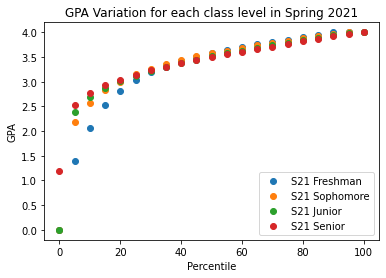

In [3]:
plt.scatter(gpa['Percentile'], gpa['S21 Freshman'], label='S21 Freshman')
plt.scatter(gpa['Percentile'], gpa['S21 Sophomore'], label='S21 Sophomore')
plt.scatter(gpa['Percentile'], gpa['S21 Junior'], label='S21 Junior')
plt.scatter(gpa['Percentile'], gpa['S21 Senior'], label='S21 Senior')
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.title('GPA Variation for each class level in Spring 2021')
plt.legend()

The graph above shows a logarithmic trend which indicates that linear regression is not possible in order to predict the GPA. Thus, performing multiple regression was preferred. Next, we try to see how GPA varies each year using boxplots and constructing their trendlines. 

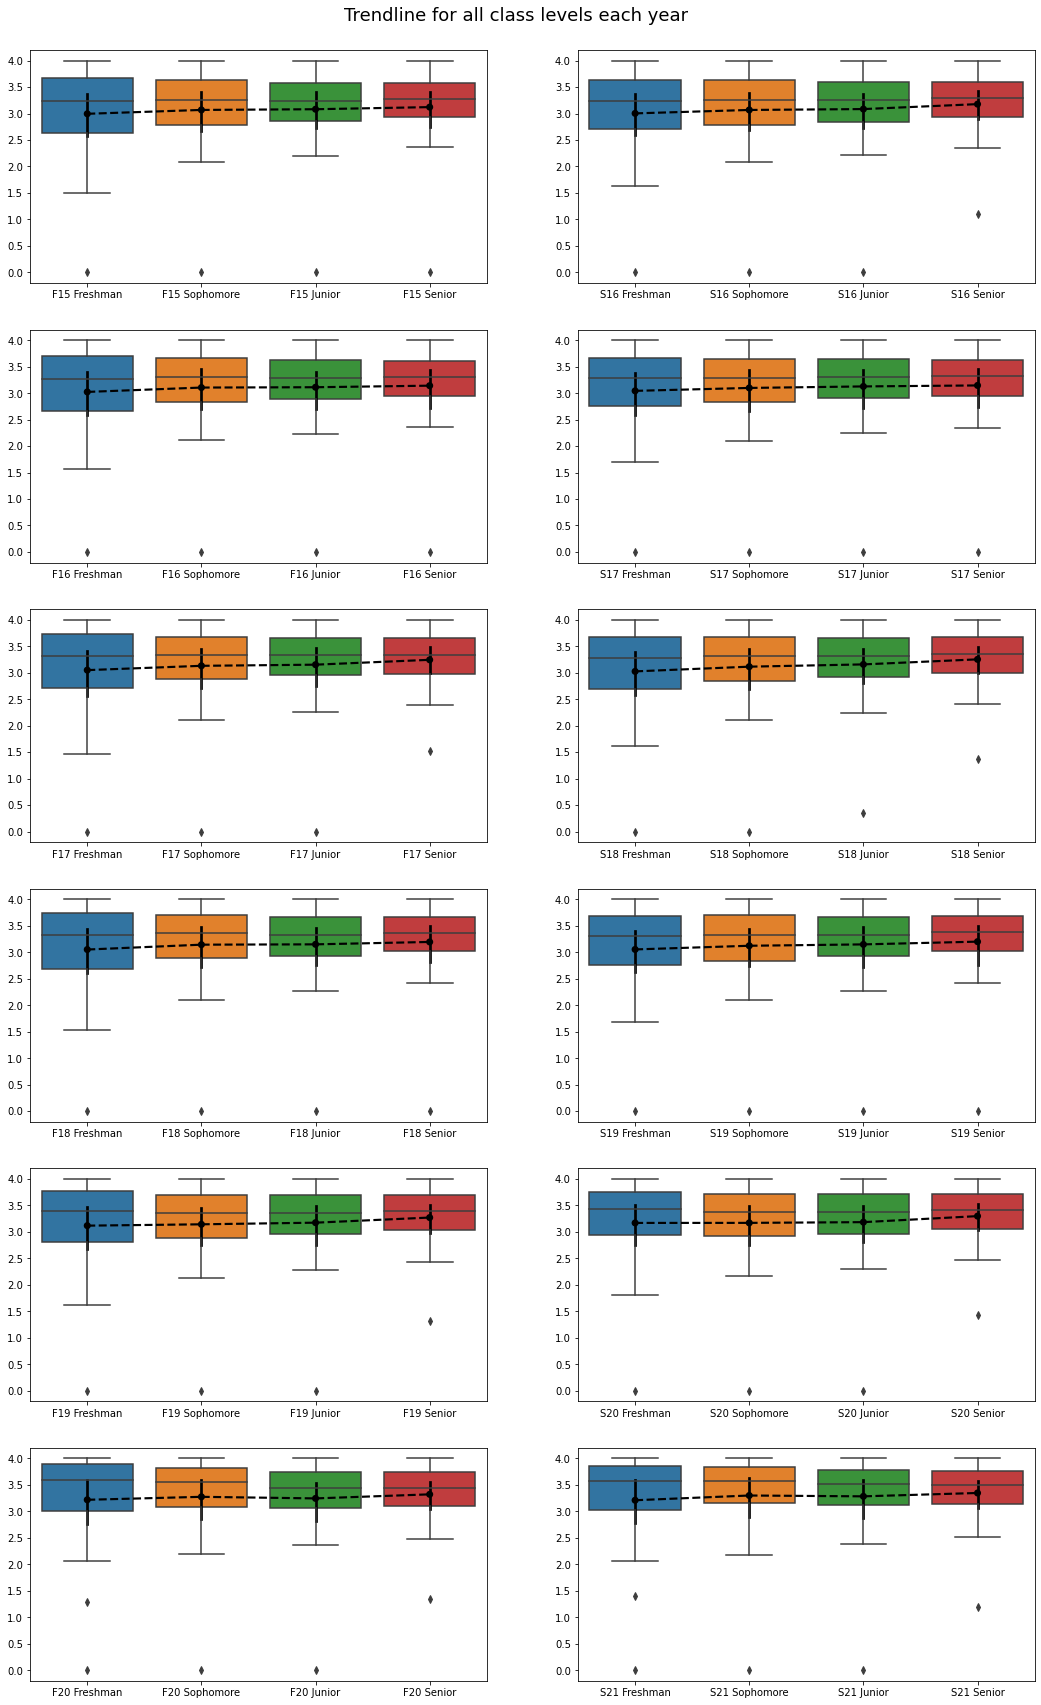

In [4]:
# Same year round, different class, see the trendline from freshmen to senior
fig, axes = plt.subplots(6, 2, figsize=(18, 30))
plt.suptitle('Trendline for all class levels each year', y = 0.90, fontsize=18)
for i, name in enumerate(frames_name):
    # if Fall semester put the first column, otherwise put the second column
    # Pointplot will plot the average GPA with different class level
    # Bloxplot will take the percentile of each class level
    if name[0] == 'F':
        sns.pointplot(ax=axes[i//2, 0], data= gpa[[name + ' Freshman', name +' Sophomore', name +' Junior', name +' Senior']], \
                     linestyles='--', scale=0.8, color='k')
        sns.boxplot(ax=axes[i//2, 0], data= gpa[[name + ' Freshman', name +' Sophomore', name +' Junior', name +' Senior']])
    else:
        sns.pointplot(ax=axes[i//2, 1], data= gpa[[name + ' Freshman', name +' Sophomore', name +' Junior', name +' Senior']], \
                     linestyles='--', scale=0.8, color='k')
        sns.boxplot(ax=axes[i//2, 1], data= gpa[[name + ' Freshman', name +' Sophomore', name +' Junior', name +' Senior']])

The trendline mostly shows an upward trend with major outliers for each class level except Seniors. Third, we analyzed similar data as the one above by using scatterplots.

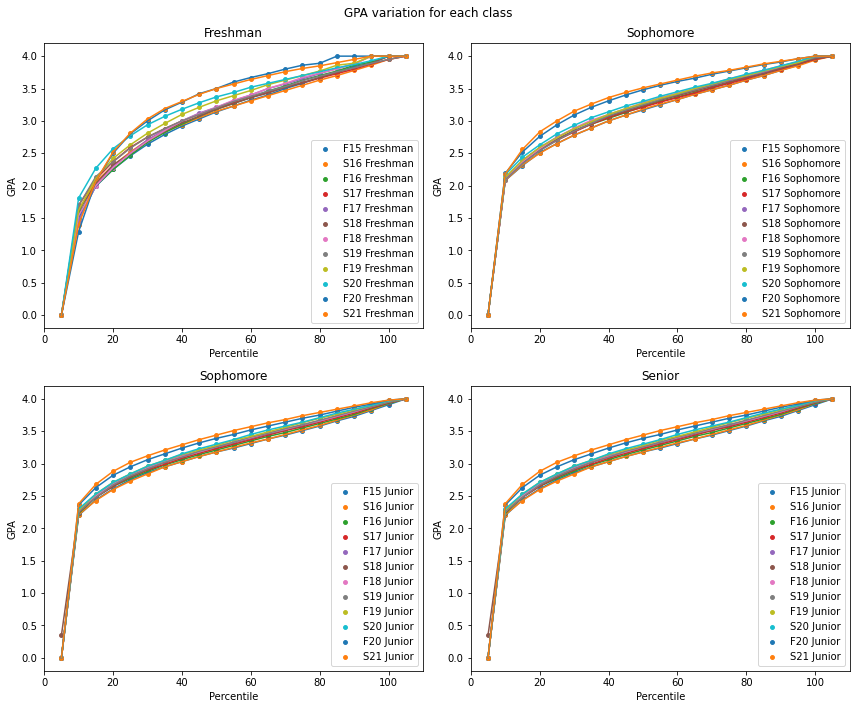

In [5]:
gpa_Freshman = []
gpa_Sophomore = []
gpa_Junior = []
gpa_Senior = []

# Collect the dataframe from the same class level
for name in frames_name:
    gpa_Freshman.append(name + ' Freshman')
    gpa_Sophomore.append(name + ' Sophomore')
    gpa_Junior.append(name +' Junior')
    gpa_Senior.append(name +' Senior')

# Put the data into the dataframe from gpa
gpa_Freshman_df = gpa[gpa_Freshman]
gpa_Sophomore_df = gpa[gpa_Sophomore]
gpa_Junior_df = gpa[gpa_Junior]
gpa_Senior_df = gpa[gpa_Senior]

# Plot the each class progress for different semesters
plt.figure(figsize=(12,10))
plt.suptitle('GPA variation for each class')

plt.subplot(2,2,1)
for name in gpa_Freshman:
    plt.scatter(np.arange(105, 0, -5), gpa_Freshman_df[name], label=name, s=15)
    plt.plot(np.arange(105, 0, -5), gpa_Freshman_df[name])
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.title('Freshman')
plt.legend()

plt.subplot(2,2,2)
for name in gpa_Sophomore:
    plt.scatter(np.arange(105, 0, -5), gpa_Sophomore_df[name], label=name, s=15)
    plt.plot(np.arange(105, 0, -5), gpa_Sophomore_df[name])
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.title('Sophomore')
plt.legend()

plt.subplot(2,2,3)
for name in gpa_Junior:
    plt.scatter(np.arange(105, 0, -5), gpa_Junior_df[name], label=name, s=15)
    plt.plot(np.arange(105, 0, -5), gpa_Junior_df[name])
plt.legend()
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.title('Sophomore')

plt.subplot(2,2,4)
for name in gpa_Junior:
    plt.scatter(np.arange(105, 0, -5), gpa_Junior_df[name], label=name, s=15)
    plt.plot(np.arange(105, 0, -5), gpa_Junior_df[name])
plt.legend()
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.title('Senior')

plt.tight_layout()

Similar logarthmic trends are observed for each class level.

Lastly, we analyzed the distribution of GPAs by percentile for each term.

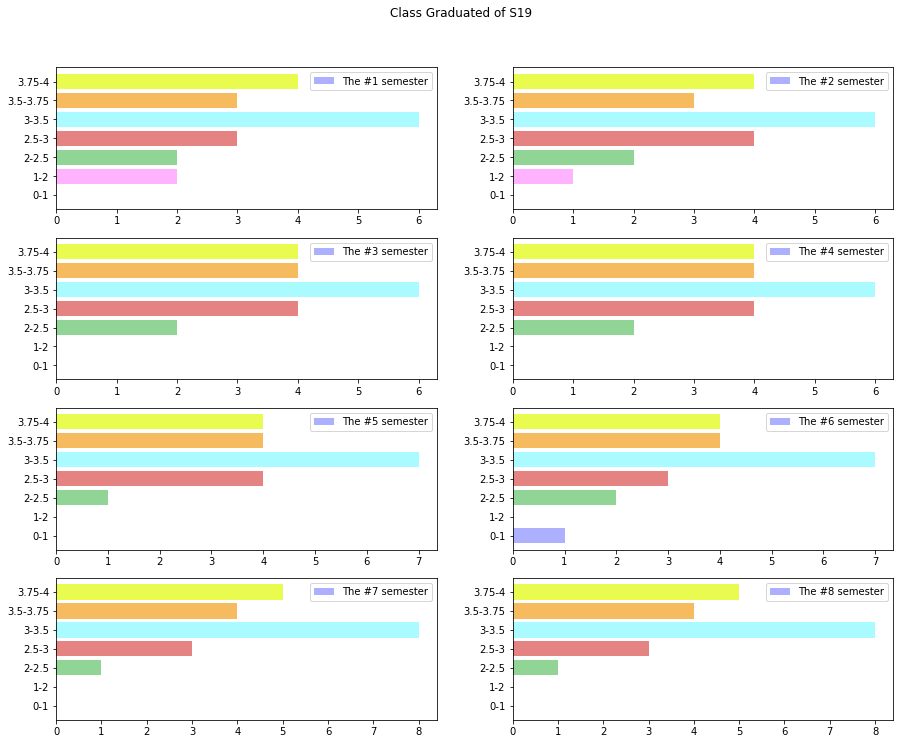

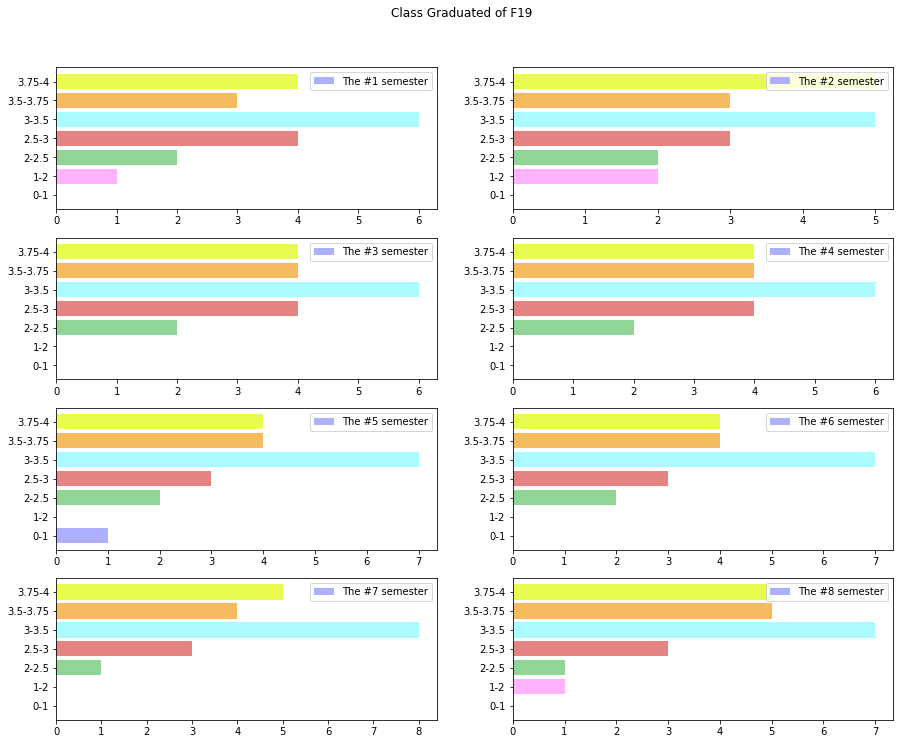

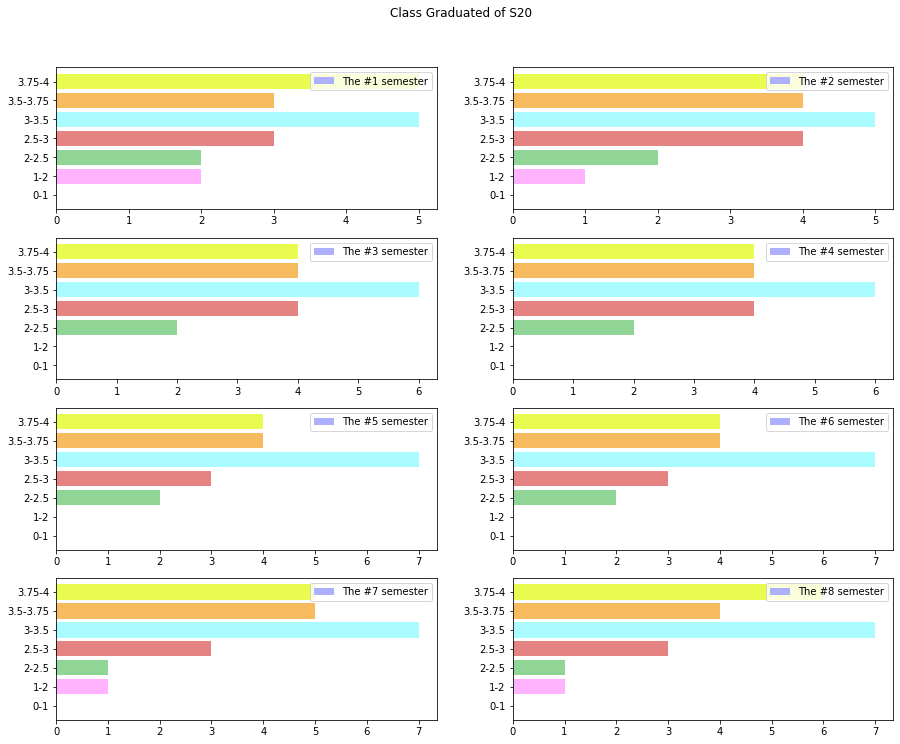

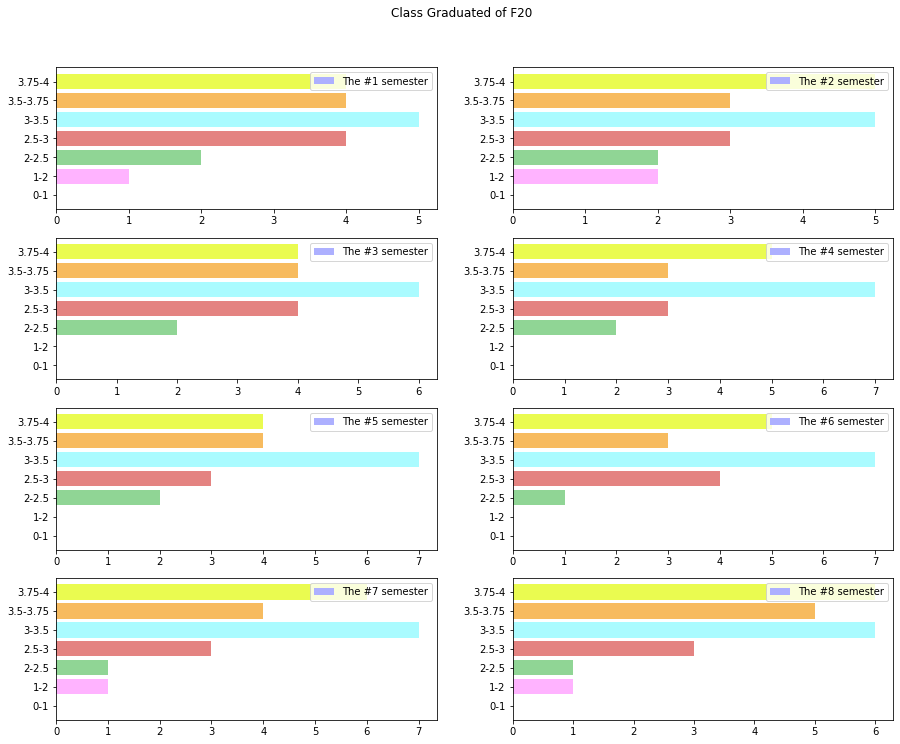

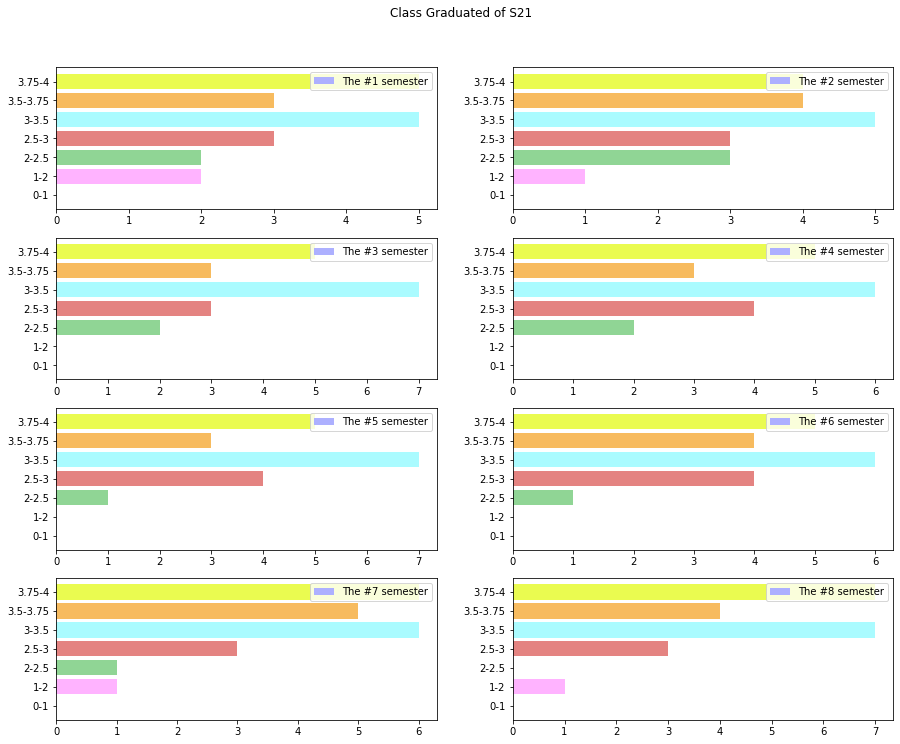

In [6]:
# Loop the frames_names list and construct a pair of each graduated class with consecutive 8 semesters
class_name = []
for i in range(len(frames_name)):
    class_pair = frames_name[i:i+8]
    if len(class_pair) != 8:
        break
    class_name.append(class_pair)

# x axis limits 7 different levels we detailed the groups of gpa between 3-4 because majority of students is between 3 - 4
x = ['0-1', '1-2', '2-2.5', '2.5-3', '3-3.5', '3.5-3.75', '3.75-4']
colors = ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]
count_lst = []

for pair in class_name:
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
    for i, name in enumerate(pair):
        # for each graduated class, the format is in [Freshman, Freshman, Sophomore, Sophomore, Junior, Junior, Senior, Senior]
        if 0 <= i <= 1: ## Collect the count of Freshman gpa and map into a list filtered by the threshold
            count_lst = [gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 0.00) & (gpa[name + ' Freshman'] <= 1.00)].count(),
                         gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 1.00) & (gpa[name + ' Freshman'] <= 2.00)].count(),
                         gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 2.00) & (gpa[name + ' Freshman'] <= 2.50)].count(),
                         gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 2.50) & (gpa[name + ' Freshman'] <= 3.00)].count(),
                         gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 3.00) & (gpa[name + ' Freshman'] <= 3.50)].count(),
                         gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 3.50) & (gpa[name + ' Freshman'] <= 3.75)].count(),
                         gpa[name + ' Freshman'][(gpa[name + ' Freshman'] > 3.75) & (gpa[name + ' Freshman'] <= 4.00)].count()]
        elif 2 <= i <= 3: ## Collect the count of Sophomore gpa and map into a list filtered by the threshold
            count_lst = [gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 0.00) & (gpa[name + ' Sophomore'] <= 1.00)].count(),
                         gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 1.00) & (gpa[name + ' Sophomore'] <= 2.00)].count(),
                         gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 2.00) & (gpa[name + ' Sophomore'] <= 2.50)].count(),
                         gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 2.50) & (gpa[name + ' Sophomore'] <= 3.00)].count(),
                         gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 3.00) & (gpa[name + ' Sophomore'] <= 3.50)].count(),
                         gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 3.50) & (gpa[name + ' Sophomore'] <= 3.75)].count(),
                         gpa[name + ' Sophomore'][(gpa[name + ' Sophomore'] > 3.75) & (gpa[name + ' Sophomore'] <= 4.00)].count()]
        elif 4 <= i <= 5: ## Collect the count of Junior gpa and map into a list filtered by the threshold
            count_lst = [gpa[name + ' Junior'][(gpa[name + ' Junior'] > 0.00) & (gpa[name + ' Junior'] <= 1.00)].count(),
                         gpa[name + ' Junior'][(gpa[name + ' Junior'] > 1.00) & (gpa[name + ' Junior'] <= 2.00)].count(),
                         gpa[name + ' Junior'][(gpa[name + ' Junior'] > 2.00) & (gpa[name + ' Junior'] <= 2.50)].count(),
                         gpa[name + ' Junior'][(gpa[name + ' Junior'] > 2.50) & (gpa[name + ' Junior'] <= 3.00)].count(),
                         gpa[name + ' Junior'][(gpa[name + ' Junior'] > 3.00) & (gpa[name + ' Junior'] <= 3.50)].count(),
                         gpa[name + ' Junior'][(gpa[name + ' Junior'] > 3.50) & (gpa[name + ' Junior'] <= 3.75)].count(),
                         gpa[name + ' Junior'][(gpa[name + ' Junior'] > 3.75) & (gpa[name + ' Junior'] <= 4.00)].count()]
        elif 6 <= i <= 7: ## Collect the count of Senior gpa and map into a list filtered by the threshold
            count_lst = [gpa[name + ' Senior'][(gpa[name + ' Senior'] > 0.00) & (gpa[name + ' Senior'] <= 1.00)].count(),
                         gpa[name + ' Senior'][(gpa[name + ' Senior'] > 1.00) & (gpa[name + ' Senior'] <= 2.00)].count(),
                         gpa[name + ' Senior'][(gpa[name + ' Senior'] > 2.00) & (gpa[name + ' Senior'] <= 2.50)].count(),
                         gpa[name + ' Senior'][(gpa[name + ' Senior'] > 2.50) & (gpa[name + ' Senior'] <= 3.00)].count(),
                         gpa[name + ' Senior'][(gpa[name + ' Senior'] > 3.00) & (gpa[name + ' Senior'] <= 3.50)].count(),
                         gpa[name + ' Senior'][(gpa[name + ' Senior'] > 3.50) & (gpa[name + ' Senior'] <= 3.75)].count(),
                         gpa[name + ' Senior'][(gpa[name + ' Senior'] > 3.70) & (gpa[name + ' Senior'] <= 4.00)].count()]
        ax = plt.subplot(4, 2, i+1)
        # vertical bar plot with x and country list, which will give the progress of gpa for each graduated class with time
        ax.barh(x, count_lst, color = [n for n in colors], label=f'The #{i+1} semester')
        fig.suptitle(f'Class Graduated of {pair[-1]}', y=0.95)
        ax.legend(loc="upper right")

A common observation among all the plots is that most students have a cumulative GPA in the 3-3.5 bracket. The least number of students have GPAs in the 0-2 bracket.

### 2.4 Multiple Regression Models
#### 2.4.1 Freshman Model

In [7]:
# created a separate dataset with only freshman GPA values
fm_gpa = gpa[['F15 Freshman', 'F16 Freshman', 'S16 Freshman', 'F17 Freshman', 'S17 Freshman', 
              'F18 Freshman', 'S18 Freshman', 'F19 Freshman', 'S19 Freshman', 'F20 Freshman', 'S21 Freshman']]
fm_gpa.head()

,F15 Freshman,F16 Freshman,S16 Freshman,F17 Freshman,S17 Freshman,F18 Freshman,S18 Freshman,F19 Freshman,S19 Freshman,F20 Freshman,S21 Freshman
1,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00
2,4.00,4.00,3.95,4.00,3.95,4.00,4.00,4.00,3.95,4.0,4.00
3,3.89,3.91,3.86,4.00,3.88,4.00,3.89,4.00,3.89,4.0,4.00
4,3.84,3.86,3.78,3.88,3.80,3.88,3.82,3.89,3.82,4.0,3.95
5,3.75,3.77,3.70,3.81,3.73,3.80,3.75,3.86,3.76,4.0,3.90


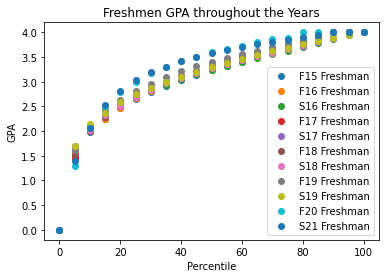

In [8]:
# plotting freshmen GPA variation throughout the years
for i in fm_gpa:
    plt.scatter(gpa['Percentile'], fm_gpa[i], label=i)
plt.title('Freshmen GPA throughout the Years')
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.legend()

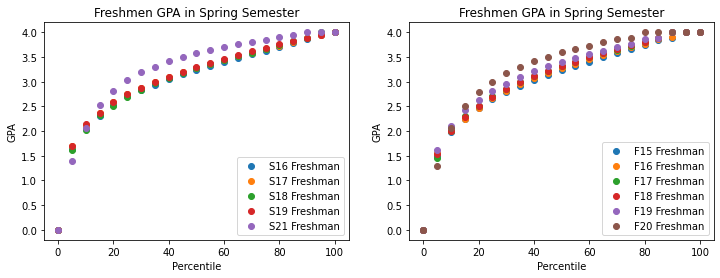

In [9]:
spr_fm_gpa, fall_fm_gpa = [], [] 
# separating spring and fall semester data for freshmen
for i in fm_gpa: 
    if i[0] == 'S': 
        spr_fm_gpa.append(fm_gpa[i]) 
    else: 
        fall_fm_gpa.append(fm_gpa[i]) 

# converting both lists to Pandas dataframes
spr_fm_gpa = pd.DataFrame(spr_fm_gpa).transpose() 
fall_fm_gpa = pd.DataFrame(fall_fm_gpa).transpose() 

# plotting observations
plt.figure(figsize=(12,4)) 

plt.subplot(1,2,1) 
for i in spr_fm_gpa: 
    plt.scatter(gpa['Percentile'], spr_fm_gpa[i], label=i) 
plt.title('Freshmen GPA in Spring Semester') 
plt.xlabel('Percentile') 
plt.ylabel('GPA') 
plt.legend() 

plt.subplot(1,2,2) 
for i in fall_fm_gpa: 
    plt.scatter(gpa['Percentile'], fall_fm_gpa[i], label=i) 
plt.title('Freshmen GPA in Spring Semester') 
plt.xlabel('Percentile') 
plt.ylabel('GPA') 
plt.legend()

From both of the above plots, a logarithmic trend was expected. Spring 2021 data is visibly different than the rest of the semesters, this could lead to a lesser accurate model. The closest match to Spring 2021 data is the Fall 2020 one. 

In [10]:
features = fm_gpa.drop('S21 Freshman', axis=1) # using Spring 2021 data as dependent variable
features = sm.add_constant(features)
var = fm_gpa['S21 Freshman']
model = sm.OLS(var, features)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           S21 Freshman   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8900.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           2.25e-18
Time:                        22:24:18   Log-Likelihood:                 66.094
No. Observations:                  21   AIC:                            -110.2
Df Residuals:                      10   BIC:                            -98.70
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0034      0.015      0.227   

The model is very accurate as indicated by the high adjusted R^2 value of 1.0. We plotted the residuals graph to confirm our findings.

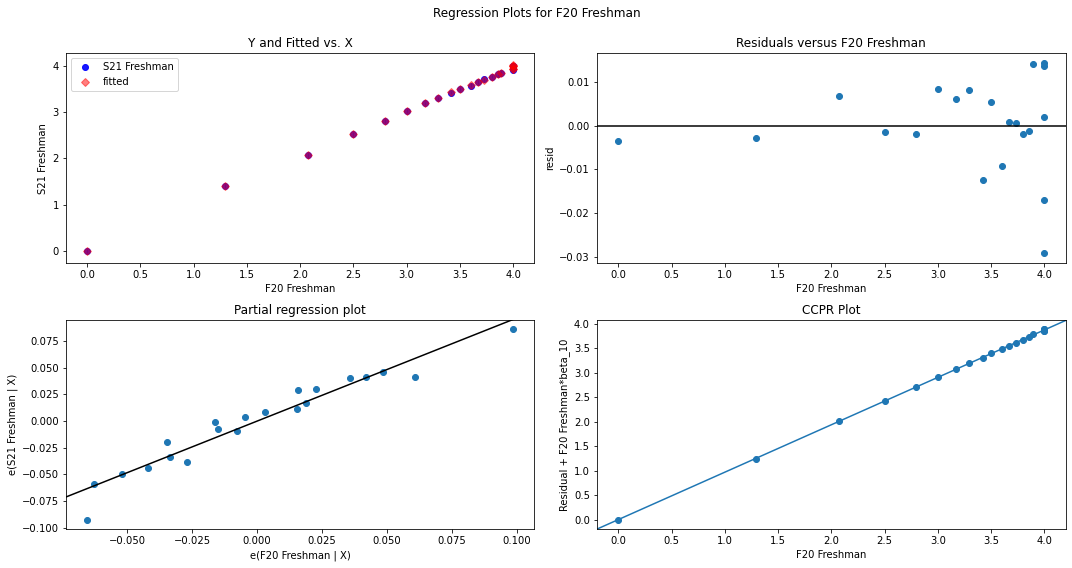

In [11]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "F20 Freshman", fig=fig)

We used the plot of a semester whose plot closely matches that of Spring 2021 data. The residuals graph shows no patterns, which indicate towards a good fit. Now that our freshman model has been approved, we'll use it to predict Spring 2021 values.

In [12]:
ypred = np.array(results.predict())
result_df = pd.DataFrame({'Percentile': gpa['Percentile'], 'S21 Freshman': np.round(ypred, 1)}, columns=['Percentile', 'S21 Freshman'])
result_df.head()

,Percentile,S21 Freshman
1,100.0,4.0
2,95.0,4.0
3,90.0,4.0
4,85.0,3.9
5,80.0,3.9


In [13]:
fm_gpa['S21 Freshman'].head()

1    4.00
2    4.00
3    4.00
4    3.95
5    3.90
Name: S21 Freshman, dtype: float64

Comparing the predicted values with actual ones shows high accuracy.

#### 2.4.2 Sophomore Model

In [16]:
# created a separate dataset with only sophomore GPA values
Sophomore_gpa=gpa[['F15 Sophomore', 'S16 Sophomore','F16 Sophomore','S17 Sophomore','F17 Sophomore',
                'S18 Sophomore','F18 Sophomore','S19 Sophomore','F19 Sophomore','S20 Sophomore','F20 Sophomore','S21 Sophomore']]

features = Sophomore_gpa.drop('S21 Sophomore', axis=1) #using Spring 2021 data as dependent variable
features = sm.add_constant(features)
var = Sophomore_gpa['S21 Sophomore']
model = sm.OLS(var, features)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          S21 Sophomore   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.824e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           3.59e-18
Time:                        22:24:45   Log-Likelihood:                 78.011
No. Observations:                  21   AIC:                            -132.0
Df Residuals:                       9   BIC:                            -119.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008      0.009     -0.089

Similar to the freshman model, this one is also very accurate as indicated by the high adjusted R^2 value of 1.0. We can use it to predict Spring 2021 values.

In [17]:
ypred = np.array(result_sop.predict())
result_df = pd.DataFrame({'Percentile': gpa['Percentile'], 'S21 Sophomore': np.round(ypred, 1)}, columns=['Percentile', 'S21 Sophomore'])
result_df.head()

,Percentile,S21 Sophomore
1,100.0,4.0
2,95.0,4.0
3,90.0,4.0
4,85.0,3.9
5,80.0,3.9


In [18]:
Sophomore_gpa['S21 Sophomore'].head()

1    4.00
2    4.00
3    3.96
4    3.92
5    3.88
Name: S21 Sophomore, dtype: float64

Comparing the predicted values with actual ones shows high accuracy.

#### 2.4.3 Junior Model

In [19]:
gpa = pd.read_csv('gpa.csv')

#Creating combined DF for F15-S17, then averaging those values via percentile and running OLS on the new array. 
juniorDF = gpa[['F15 Junior','S16 Junior','F16 Junior','S17 Junior']]
avgS17 = []
for i in range(0,20):
    x = sum(juniorDF.loc[i])/4
    avgS17.append(x)
percentiles = np.arange(105,5,-5) # average percentile

avgS17 = np.array(avgS17)

In [20]:
var = avgS17
model = sm.OLS(var,percentiles)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              173.4
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                    5.30e-11
Time:                        22:32:17   Log-Likelihood:                         -29.053
No. Observations:                  20   AIC:                                      60.11
Df Residuals:                      19   BIC:                                      61.10
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

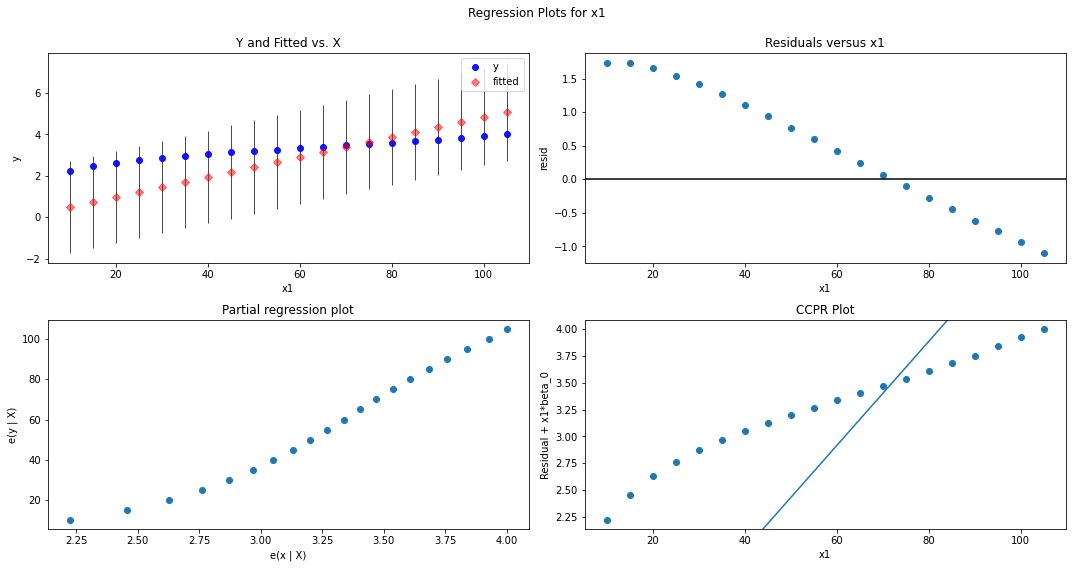

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "x1", fig=fig)

Our model has an adjusted R^2 value of 0.896 which indicates high accuracy. The residuals plot follows a pattern which is not entirely promising.

In [22]:
#Creating combined DF for F19-S21, then averaging those values via percentile and running OLS on the new array. 
juniorDF2 = gpa[['F19 Junior','S20 Junior','F20 Junior','S21 Junior']]

avgS21 = []

for i in range(0,20):
    x = sum(juniorDF2.loc[i])/4
    avgS21.append(x)

In [23]:
avgS21 = np.array(avgS21)
var2 = avgS21
model = sm.OLS(var2,percentiles)
results2 = model.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              158.7
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                    1.13e-10
Time:                        22:32:18   Log-Likelihood:                         -30.574
No. Observations:                  20   AIC:                                      63.15
Df Residuals:                      19   BIC:                                      64.14
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

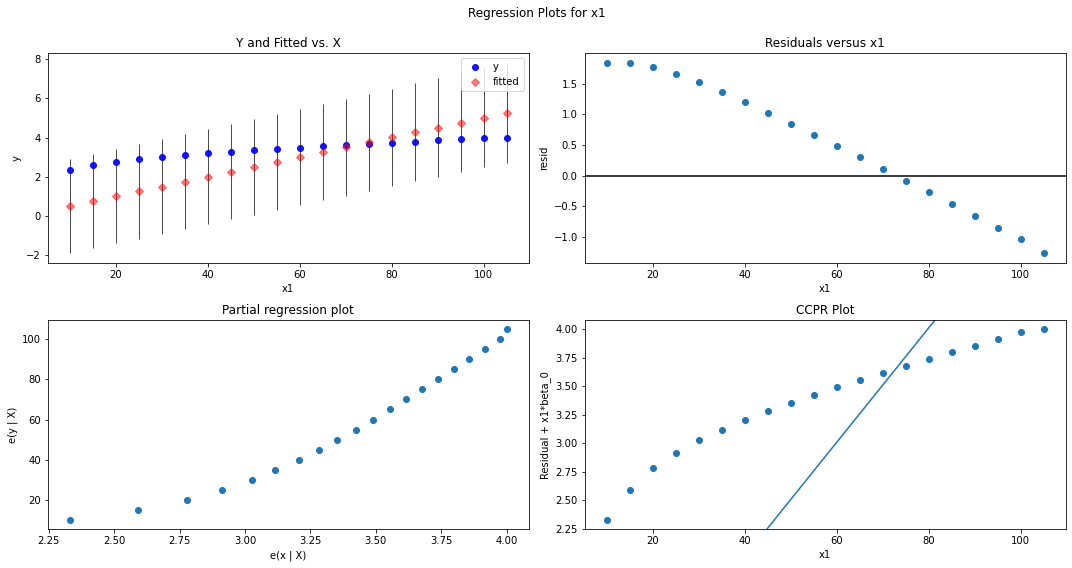

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results2, "x1", fig=fig)

Adjusted R^2 value is 0.887 which is similar to the value obtained by the previous model. The residual plot also follows a similar trend.

Text(0.5, 1.0, 'F15-S17 Junior Data')

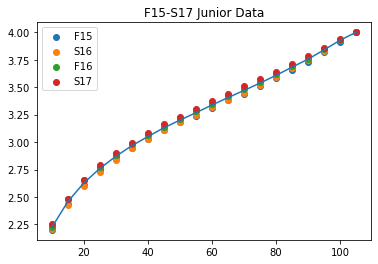

In [25]:
#Scatter of values from F15-S17, with line plotted of the average of those values
juniorDF.drop(index=20,inplace=True)
plt.scatter(percentiles,juniorDF['F15 Junior'], label = 'F15')
plt.scatter(percentiles,juniorDF['S16 Junior'], label = 'S16')
plt.scatter(percentiles,juniorDF['F16 Junior'], label = 'F16')
plt.scatter(percentiles,juniorDF['S17 Junior'], label = 'S17')
plt.plot(percentiles,avgS17)
plt.legend()
plt.title('F15-S17 Junior Data')

Text(0.5, 1.0, 'F19-S21 Junior Data')

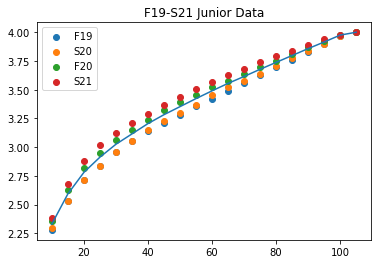

In [26]:
#Scatter of values from F19-S21, with line plotted of the average of those values
juniorDF2.drop(index=20,inplace=True)
plt.scatter(percentiles,juniorDF2['F19 Junior'], label = 'F19')
plt.scatter(percentiles,juniorDF2['S20 Junior'], label = 'S20')
plt.scatter(percentiles,juniorDF2['F20 Junior'], label = 'F20')
plt.scatter(percentiles,juniorDF2['S21 Junior'], label = 'S21')
plt.plot(percentiles,avgS21)
plt.legend()
plt.title('F19-S21 Junior Data')

#### 2.4.4 Alternate Model

In [27]:
gpa.set_index('Percentile', inplace=True)
res=[]
cols=['Freshman','Sophomore','Junior','Senior']
gpa
for i in range(16,21):
    a1=gpa.filter(like=f'S{i}', axis=1)
    a2=gpa.filter(like=f'F{i}', axis=1)
    a2.columns=a1.columns
    res.append((a1+a2)/2)
    res[-1].columns=[ x+f'{i}' for x in cols]
g15=gpa.filter(like='15', axis=1)
g15.columns=[x+'15' for x in cols]
g21=gpa.filter(like='21', axis=1)
g21.columns=[x+'21' for x in cols]
res.insert(0,g15)
res.append(g21)
# res.insert(0,gpa.filter(like='21', axis=1))
dataset=pd.concat(res, axis=1)
dataset

,Freshman15,Sophomore15,Junior15,Senior15,Freshman16,Sophomore16,Junior16,Senior16,Freshman17,Sophomore17,...,Junior19,Senior19,Freshman20,Sophomore20,Junior20,Senior20,Freshman21,Sophomore21,Junior21,Senior21
Percentile,,,,,,,,,,,,,,,,,,,,,
100.0,4.00,4.00,4.00,4.00,4.000,4.000,4.000,4.000,4.000,4.000,...,4.000,4.000,4.000,4.000,4.000,4.000,4.00,4.00,4.00,4.00
95.0,4.00,3.96,3.91,3.91,3.975,3.950,3.930,3.915,3.975,3.970,...,3.960,3.950,4.000,4.000,3.975,3.965,4.00,4.00,3.98,3.97
90.0,3.89,3.86,3.82,3.81,3.885,3.865,3.840,3.825,3.940,3.885,...,3.890,3.880,3.965,3.940,3.910,3.900,4.00,3.96,3.94,3.92
85.0,3.84,3.78,3.73,3.73,3.820,3.795,3.755,3.740,3.840,3.810,...,3.820,3.810,3.935,3.880,3.855,3.840,3.95,3.92,3.89,3.87
80.0,3.75,3.70,3.66,3.65,3.735,3.715,3.680,3.670,3.770,3.740,...,3.750,3.750,3.910,3.825,3.795,3.780,3.90,3.88,3.84,3.82
75.0,3.67,3.63,3.58,3.58,3.665,3.645,3.605,3.600,3.695,3.665,...,3.685,3.690,3.825,3.770,3.730,3.725,3.85,3.83,3.79,3.77
70.0,3.58,3.55,3.51,3.52,3.590,3.570,3.535,3.540,3.620,3.600,...,3.615,3.630,3.780,3.710,3.670,3.665,3.81,3.78,3.74,3.71
65.0,3.50,3.48,3.44,3.45,3.505,3.495,3.465,3.470,3.545,3.530,...,3.550,3.565,3.720,3.650,3.610,3.605,3.76,3.74,3.68,3.66
60.0,3.40,3.41,3.38,3.40,3.425,3.425,3.400,3.410,3.470,3.455,...,3.480,3.505,3.655,3.590,3.550,3.550,3.70,3.69,3.63,3.60


Combine two semesters GPA to one school year average GPA of each school year of students.

In [28]:
train_target=dataset.filter(regex="1[5-7]", axis=1).filter(like='Freshman', axis=1)
test_target=dataset.filter(regex="18",axis=1).filter(like='Freshman', axis=1)
test_features=dataset[[(cols[i]+str(18+i)) for i in range(1,4)]]
features=[]
for i in range(15,18):
    for j in range(1,4):
        features.append(cols[j]+f'{i+j}')
train_features=dataset[features]
train_features.head()

,Sophomore16,Junior17,Senior18,Sophomore17,Junior18,Senior19,Sophomore18,Junior19,Senior20
Percentile,,,,,,,,,
100.0,4.000,4.000,4.000,4.000,4.000,4.00,4.000,4.00,4.000
95.0,3.950,3.945,3.945,3.970,3.955,3.95,3.980,3.96,3.965
90.0,3.865,3.870,3.865,3.885,3.875,3.88,3.900,3.89,3.900
85.0,3.795,3.790,3.800,3.810,3.800,3.81,3.830,3.82,3.840
80.0,3.715,3.720,3.730,3.740,3.730,3.75,3.755,3.75,3.780


Set up train target as Freshman 15, Freshman 16, Freshman 17, test target would be Freshman 18. Even we have the GPA from Freshman 18, but we are using Sophomore19, Junior20, Senior21 grades to predict the grade of Freshman 18, because they are mostly same students.

In [29]:
train_target=train_target.values.reshape((-1,1))
train_features=train_features.values.reshape((-1,3))

In [30]:
features = sm.add_constant(train_features)
model = sm.OLS(train_target, features)
results = model.fit()
print(results.summary())
print(results.predict())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3448.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           3.35e-66
Time:                        22:32:20   Log-Likelihood:                 77.599
No. Observations:                  63   AIC:                            -147.2
Df Residuals:                      59   BIC:                            -138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2306      0.129      1.783      0.0

import the OLS model.

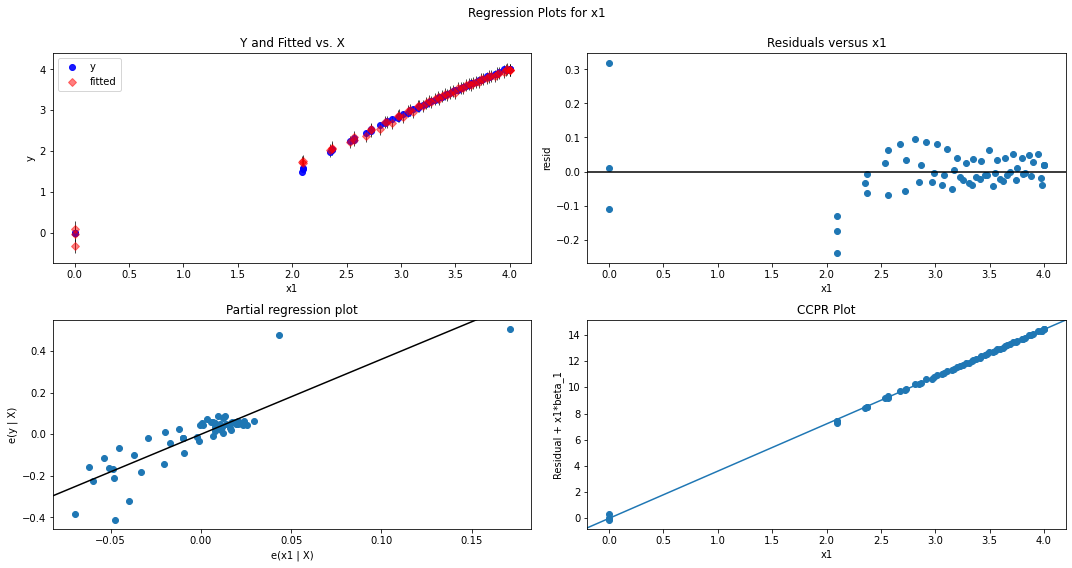

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 1, fig=fig)

([<matplotlib.axis.XTick at 0x7fdc0a2f7a30>,
 [Text(1, 0, 'Freshman'),
  Text(2, 0, 'Sophomore'),
  Text(3, 0, 'Junior'),
  Text(4, 0, 'Senior')])

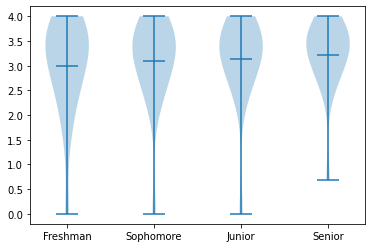

In [32]:
colors=['r','g','b','y']
plt.violinplot([dataset[cols[j]+f'{15+j}']for j in range(4)], showmeans=True)
plt.xticks(range(1,5), cols)

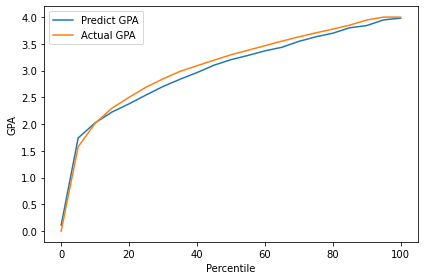

In [33]:
xx=np.arange(0,101,5)
plt.plot(xx[::-1],results.predict()[0:63:3],label='Predict GPA')
plt.plot(dataset['Freshman18'],label='Actual GPA')
plt.xlabel('Percentile')
plt.ylabel('GPA')
plt.legend()
plt.tight_layout()

Comparison of GPA in four years of MSU.

In [34]:
# model.predict(sm.add_constant(test_features.values))
f=sm.add_constant(test_features.values)
f.shape
# model.predict(f)
pred=results.predict(f)
label=test_target.values
print(mean_squared_error(label, pred))

0.017756787914794313


Comparison of prediction GPA and actual GPA of Freshman 18.

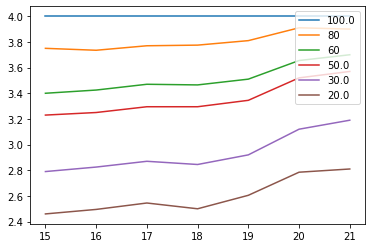

In [35]:
# 
x=range(15,22)
for i in [100.0,80,60,50.0,30.0,20.0]:
    y=dataset.filter(like='Freshman', axis=1).loc[i]
    plt.plot(x,y)
plt.legend(labels="100.0,80,60,50.0,30.0,20.0".split(","),loc='upper right')
plt.show()

According the dataset and plot, we noticed that students' grades have improved in overall years.

### 3 Conclusion

With this project, we attempted to look at the trends in GPA data from the period of Fall 2015 through Spring 2021. 

Different computational techniques were used such as Ordinary Least Squares Regression. Each group member took on a different age group respectively (e.g. Freshman, Sophomore etc.). After data analysis had been conducted, the results were displayed through scatter plots, box plots, linear regression exog, and seaborn graphs.

### 4 Datasets Used
Michigan State University. Ranking of Cumulative GPAs by Class and Level of Primary Major. Retrieved April 24, 2021, from https://reg.msu.edu/roinfo/ReportView.aspx?Report=UTE-RankCumGPAs.